In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
def font_size(s=22):
    font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : s}

    matplotlib.rc('font', **font)

In [2]:
# Read in files and name vars with syntax [male/female]_[authorship_position]_[numauths]
def cols(name):
    return [name + '_year', name + '_count']

# Female
# 1st auths
f_0_3 = pd.read_csv('female_0th_auth_dataset_3or_more_auths_per_yr.csv')
f_0_3.index = f_0_3['_id']
f_0_3.columns = cols('f_0_3')

# 2nd auths
f_1_3 = pd.read_csv('female_1th_auth_dataset_3or_more_auths_per_yr.csv')
f_1_3.index = f_1_3['_id']
f_1_3.columns = cols('f_1_3')


# Male
# 1st auths
m_0_3 = pd.read_csv('male_0th_auth_dataset_3or_more_auths_per_yr.csv')
m_0_3.index = m_0_3['_id']
m_0_3.columns = cols('m_0_3')

# 2nd auths
m_1_3 = pd.read_csv('male_1th_auth_dataset_3or_more_auths_per_yr.csv')
m_1_3.index = m_1_3['_id']
m_1_3.columns = cols('m_1_3')

In [3]:
# Female
counter = 0
for d in [f_0_3, f_1_3]:
    if counter == 0:
        master = d
    else:
        master = master.join(d)
    counter += 1
    
female = master[(master.index < 2017) & (master.index >= 1960)]

# Male
counter = 0
for d in [m_0_3, m_1_3]:
    if counter == 0:
        master = d
    else:
        master = master.join(d)
    counter += 1

male = master[(master.index < 2017) & (master.index >= 1960)]

In [4]:
female.head()

,f_0_3_year,f_0_3_count,f_1_3_year,f_1_3_count
_id,,,,
1960.0,1960.0,0,1960.0,0
1961.0,1961.0,0,1961.0,0
1962.0,1962.0,0,1962.0,0
1963.0,1963.0,0,1963.0,1
1964.0,1964.0,0,1964.0,0


In [5]:
male.head()

,m_0_3_year,m_0_3_count,m_1_3_year,m_1_3_count
_id,,,,
1960.0,1960.0,0,1960.0,0
1961.0,1961.0,0,1961.0,0
1962.0,1962.0,0,1962.0,0
1963.0,1963.0,1,1963.0,0
1964.0,1964.0,0,1964.0,0


In [6]:
# Female
female['female_firsts'] = female.f_0_3_count
female['female_seconds'] = female.f_1_3_count
female_totals = female.female_seconds + female.female_firsts

female['female_first_prop'] = female.female_firsts / female_totals
numerator = (female['female_first_prop']*(1-female['female_first_prop']))
female['female_first_prop_error'] = 1.96*(np.sqrt(numerator/female_totals))
female['female_first_prop_max_estimate'] = female['female_first_prop'] + female['female_first_prop_error']
female['female_first_prop_min_estimate'] = female['female_first_prop'] - female['female_first_prop_error']


# Male
male['male_firsts'] = male.m_0_3_count
male['male_seconds'] = male.m_1_3_count
male_totals = male.male_seconds + male.male_firsts

male['male_first_prop'] = male.male_firsts / male_totals
numerator = (male['male_first_prop']*(1-male['male_first_prop']))
male['male_first_prop_error'] = 1.96*(np.sqrt(numerator/male_totals))
male['male_first_prop_max_estimate'] = male['male_first_prop'] + male['male_first_prop_error']
male['male_first_prop_min_estimate'] = male['male_first_prop'] - male['male_first_prop_error']

/Users/ilya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ilya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ilya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

/Users/ilya/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


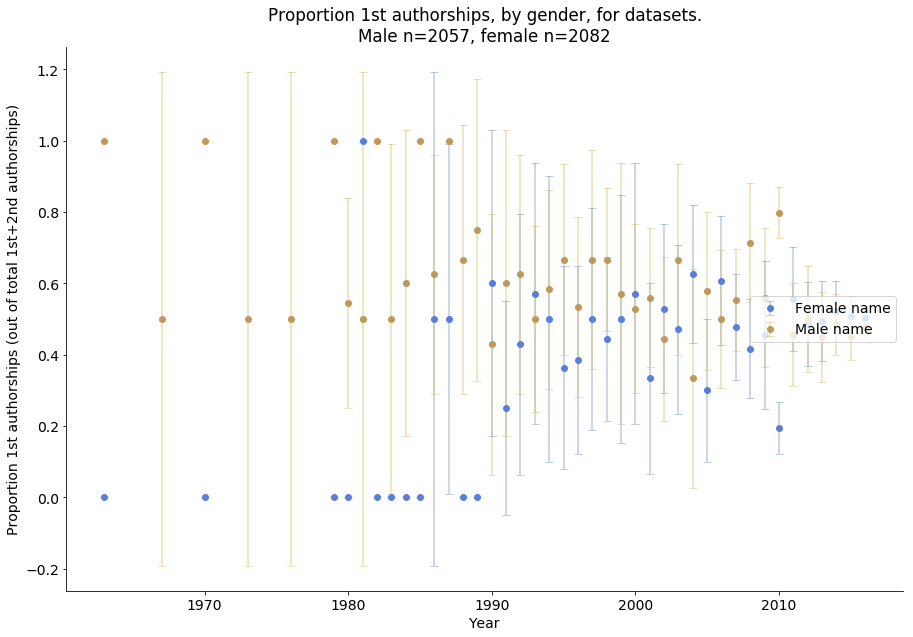

In [7]:
plt.figure(figsize=(15,10))
font_size(14)

# Female
plt.errorbar(x=female.index, y=female.female_first_prop, yerr=female.female_first_prop_error, fmt='o', label='Female name',
            ecolor=[.48, .6, .75,.5], color=[.35, .5, .85,1], capsize=4)
# Male
plt.errorbar(x=male.index, y=male.male_first_prop, yerr=male.male_first_prop_error, fmt='o', label='Male name',
            ecolor=[.84,.75, .42, .5], color=[.75,.6, .36, 1], capsize=4)

plt.legend(loc=5)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('Year')
plt.ylabel('Proportion 1st authorships (out of total 1st+2nd authorships)')
plt.title("Proportion 1st authorships, by gender, for datasets.\nMale n={}, female n={}".format(
    male_totals.sum(), female_totals.sum()), color='black')
plt.savefig('/Users/ilya/code/publishing_biases/analyze/analyses/dataset/prop_1st_authorships.png',
           dpi=400)

In [8]:
female_sums = female.female_firsts.sum() / float(female_totals.sum())
male_sums = male.male_firsts.sum() / float(male_totals.sum())
from scipy.stats import chisquare as chi

# How many first authorships would we expect vs observe?
f_observed = female.female_firsts.sum()
f_expected = female_totals.sum()/2.0

m_observed = male.male_firsts.sum()
m_expected = male_totals.sum()/2.0

print chi([m_observed, f_observed], f_exp=[m_expected, f_expected])

Power_divergenceResult(statistic=2.3773149672377585, pvalue=0.12310898094905326)


In [10]:
print ([m_observed, f_observed], [m_expected, f_expected])

([1055, 999], [1028.5, 1041.0])
